# **FGV EESP**

- ## VAR e VECM - Expectativa de Inflação
---



### **Bibliotecas**

In [12]:
# Modelo VAR
install.packages("vars")

# Modelo VECM
install.packages("tsDyn")

# Função tidy()
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(tsDyn)
library(vars)
library(tidyverse)
library(zoo)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "minimum_wage_increase", "minimum_wage_increase_deflated", "income_increase", "income_increase_deflated", "household_income_deflated", "household_income_deflated_trend", "household_income_deflated_trend_diff", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_trend_diff", "pib", "primary_fiscal_result", "primary_fiscal_result_pct_pib", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_pct_pib_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [4]:
str(df_public_data)

'data.frame':	210 obs. of  33 variables:
 $ year                                    : num  2006 2006 2006 2006 2006 ...
 $ month_name                              : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                              : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                                   : Time-Series  from 2006 to 2023: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation            : Time-Series  from 2006 to 2023: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation          : Time-Series  from 2006 to 2023: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ inflation_target                        : Time-Series  from 2006 to 2023: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound            : Time-Series  from 2006 to 2023: 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ inflation_target_upper_bound            : Time-Series  from 2006 to 2023: 6

### **Modelo VAR**

In [5]:
# Selecionar variáveis do modelo VAR
var_model_variables <- df_public_data[, c("market_inflation_expectation", "ipca_lag", "inflation_target_wtd_avg", "primary_fiscal_result_pct_pib_lag", "selic_deflated_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")]

In [18]:
# Selecionar a ordem adequada do modelo VAR
lag_select <- VARselect(var_model_variables, lag.max = 12, type = "const")

print(lag_select$selection)

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      2      2      5 


In [26]:
# Ajustar o modelo VAR com uma ordem escolhida
var_model = VAR(var_model_variables, p = 2, type = "none")

tidy(var_model)

group,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
market_inflation_expectation,market_inflation_expectation.l1,1.150796539,0.071228783,16.1563413,9.197130e-38
market_inflation_expectation,ipca_lag.l1,0.050646658,0.053583343,0.9451941,3.457355e-01
market_inflation_expectation,inflation_target_wtd_avg.l1,2.713068058,3.249224893,0.8349893,4.047508e-01
market_inflation_expectation,primary_fiscal_result_pct_pib_lag.l1,-0.027907900,0.021387436,-1.3048736,1.934816e-01
market_inflation_expectation,selic_deflated_lag.l1,0.001810250,0.051032210,0.0354727,9.717393e-01
market_inflation_expectation,real_exchange_rate_trend_diff_lag.l1,0.002604899,0.004293803,0.6066648,5.447827e-01
market_inflation_expectation,household_income_deflated_trend_diff_lag.l1,0.085350103,0.058533404,1.4581435,1.464180e-01
market_inflation_expectation,market_inflation_expectation.l2,-0.265990054,0.074101128,-3.5895547,4.195330e-04
market_inflation_expectation,ipca_lag.l2,-0.011027948,0.054788991,-0.2012804,8.406902e-01


In [27]:
summary(var_model)


VAR Estimation Results:
Endogenous variables: market_inflation_expectation, ipca_lag, inflation_target_wtd_avg, primary_fiscal_result_pct_pib_lag, selic_deflated_lag, real_exchange_rate_trend_diff_lag, household_income_deflated_trend_diff_lag 
Deterministic variables: none 
Sample size: 208 
Log Likelihood: 535.076 
Roots of the characteristic polynomial:
1.001 1.001 0.9778 0.9778 0.968 0.968 0.7893 0.7893 0.7173 0.7173 0.4594 0.4594 0.3222 0.05929
Call:
VAR(y = var_model_variables, p = 2, type = "none")


Estimation results for equation market_inflation_expectation: 
market_inflation_expectation = market_inflation_expectation.l1 + ipca_lag.l1 + inflation_target_wtd_avg.l1 + primary_fiscal_result_pct_pib_lag.l1 + selic_deflated_lag.l1 + real_exchange_rate_trend_diff_lag.l1 + household_income_deflated_trend_diff_lag.l1 + market_inflation_expectation.l2 + ipca_lag.l2 + inflation_target_wtd_avg.l2 + primary_fiscal_result_pct_pib_lag.l2 + selic_deflated_lag.l2 + real_exchange_rate_trend_d

In [28]:
# Serial Correlation
serial_test <- serial.test(var_model, lags.pt = 12, type = "PT.asymptotic")

print(serial_test)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 971.75, df = 490, p-value < 2.2e-16



$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 971.75, df = 490, p-value < 2.2e-16



**Resultado**

- Como o p-value é menor que um nível de significância de 5%, não se pode afirmar que as variáveis não possuem correlação serial

In [29]:
# Heteroscedasticity
arch_test <- arch.test(var_model, lags.multi = 12, multivariate.only = TRUE)

print(arch_test)


	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 5488, df = 9408, p-value = 1



$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 5488, df = 9408, p-value = 1



**Resultado**

- Como o p-value é **maior** que um nível de significância de 5%, pode-se afirmar que o modelo não possui heteroscedasticidade

In [30]:
# Normal Distribution of Residuals
normal_test <- normality.test(var_model, multivariate.only = TRUE)

print(normal_test)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 3638.7, df = 14, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 293.31, df = 7, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 3345.4, df = 7, p-value < 2.2e-16




$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 3638.7, df = 14, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 293.31, df = 7, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object var_model
Chi-squared = 3345.4, df = 7, p-value < 2.2e-16




**Resultado**

- Como o p-value é menor que um nível de significância de 5% no JB-test, não se pode afirmar que os resíduos são distribuídos de forma gaussiana

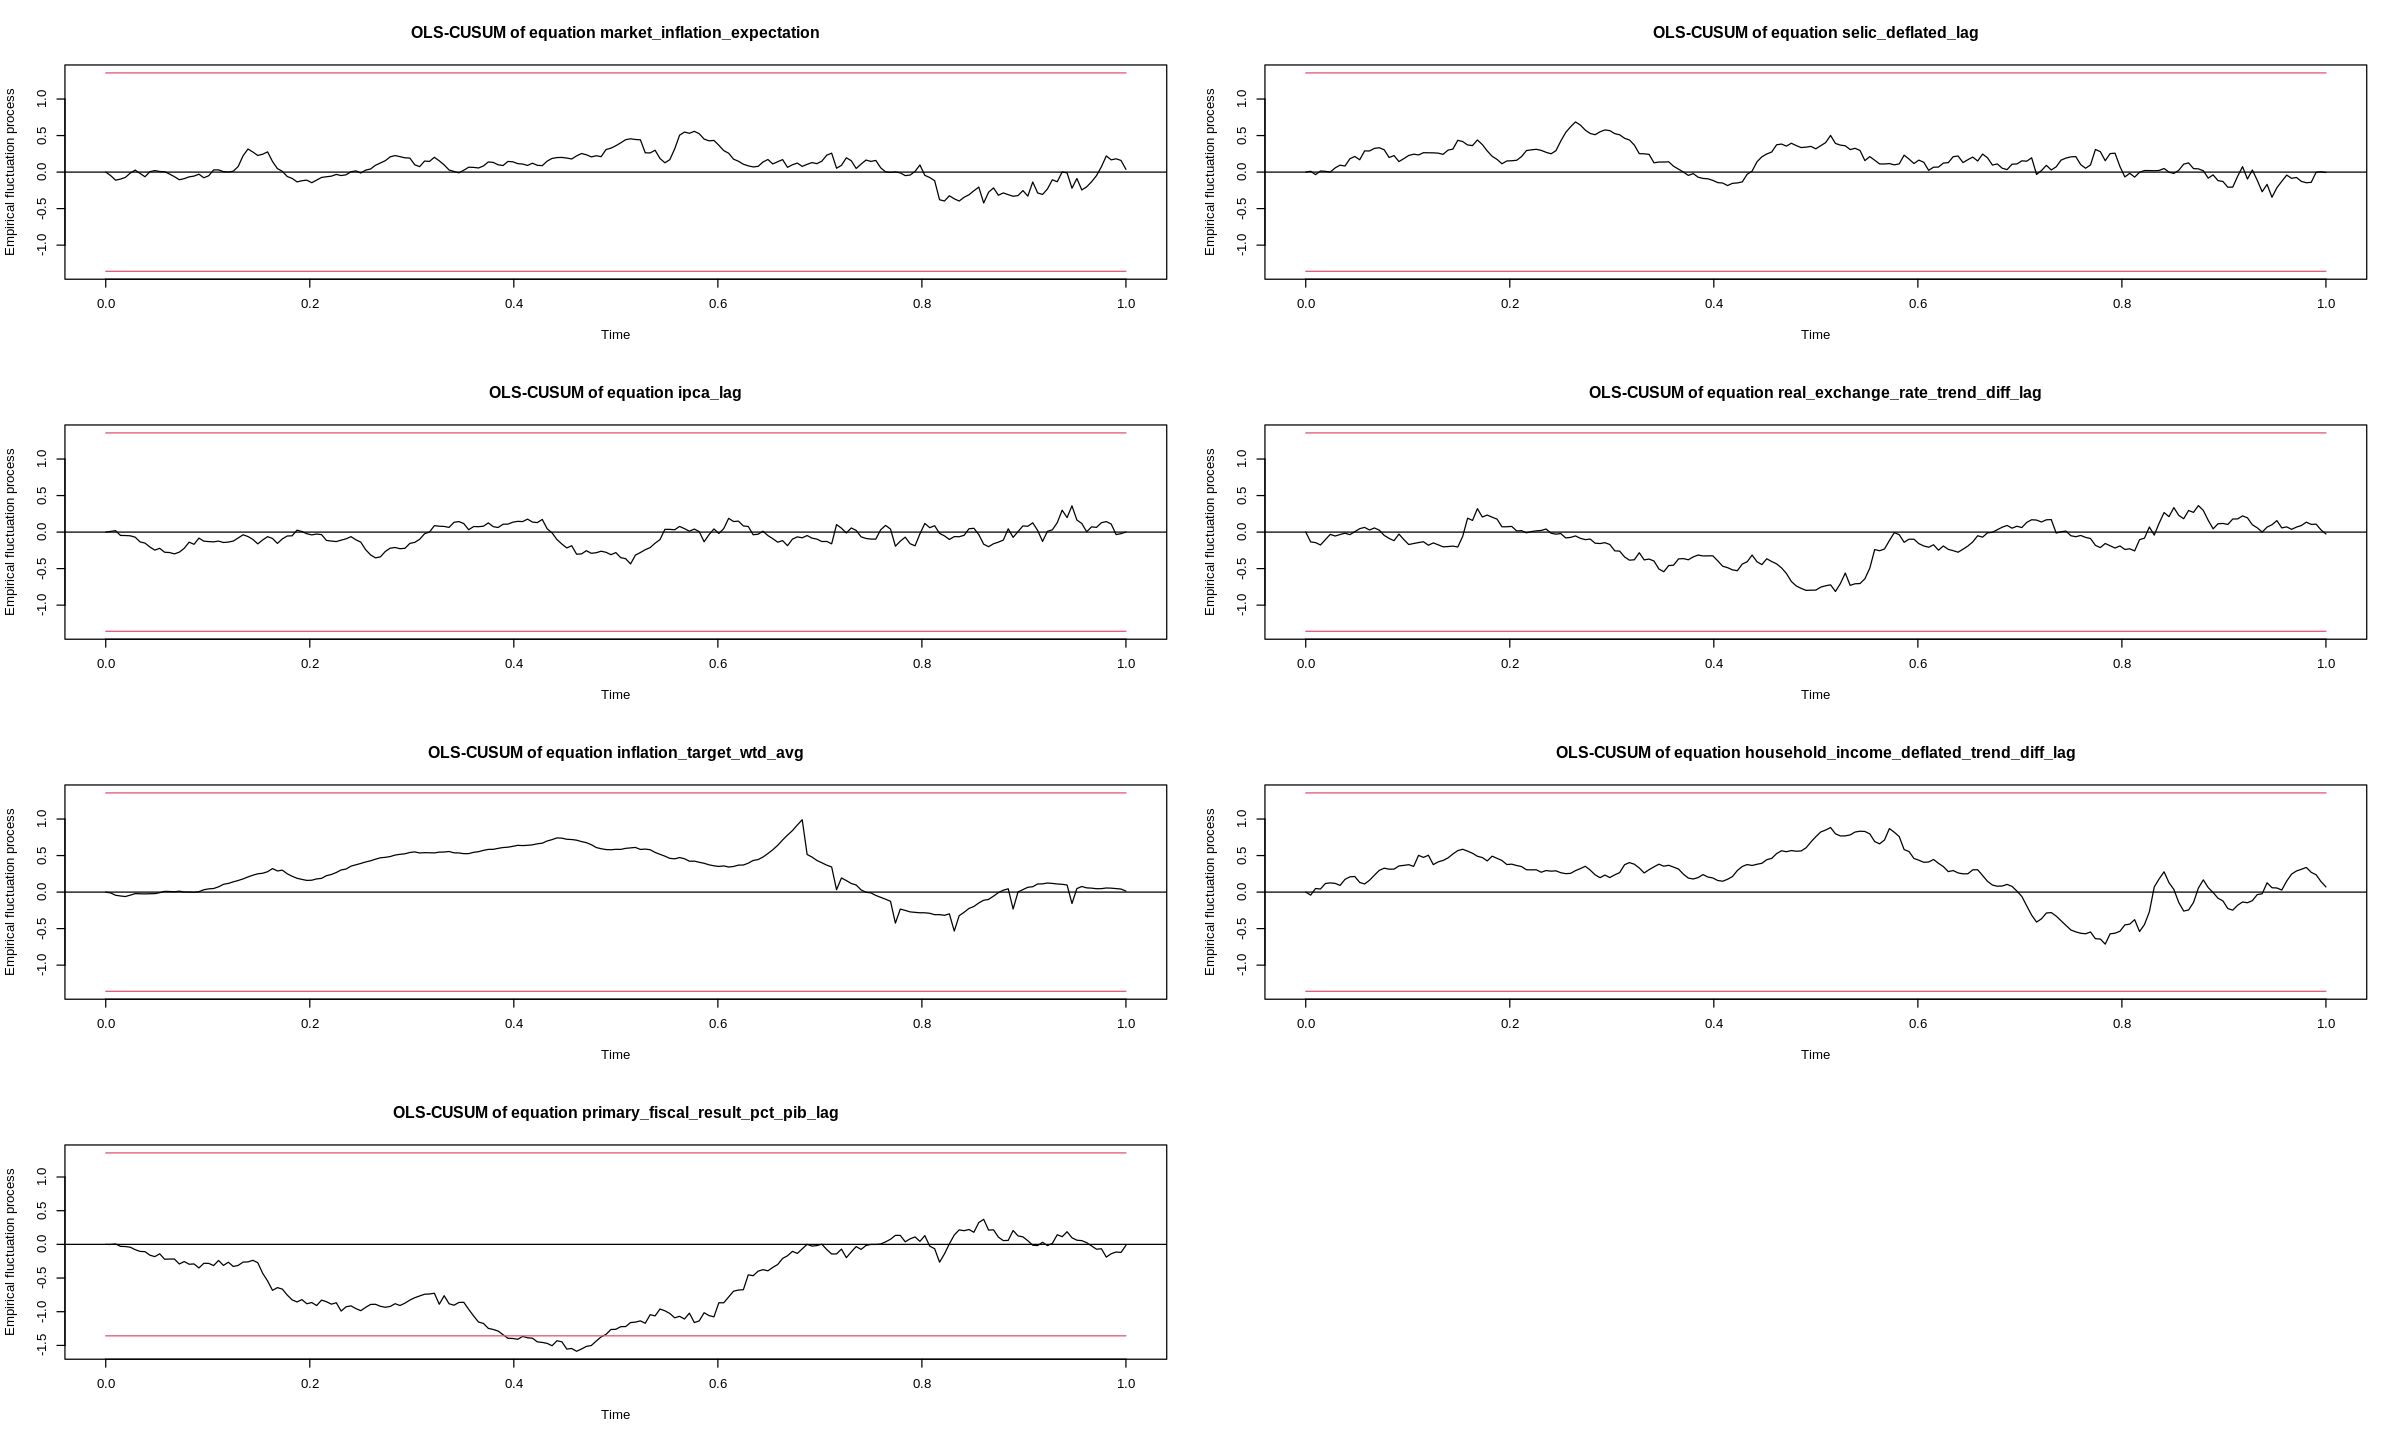

In [33]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 12)

# Structural Breaks in Residuals
stability_test <- stability(var_model, type = "OLS-CUSUM")

plot(stability_test)

**Resultado**

- Como os valores estão entre as barras vermelhas, com exceção da variável relacionada ao resultado fiscal, pode-se afirmar que não há quebra estrutural nos resíduos

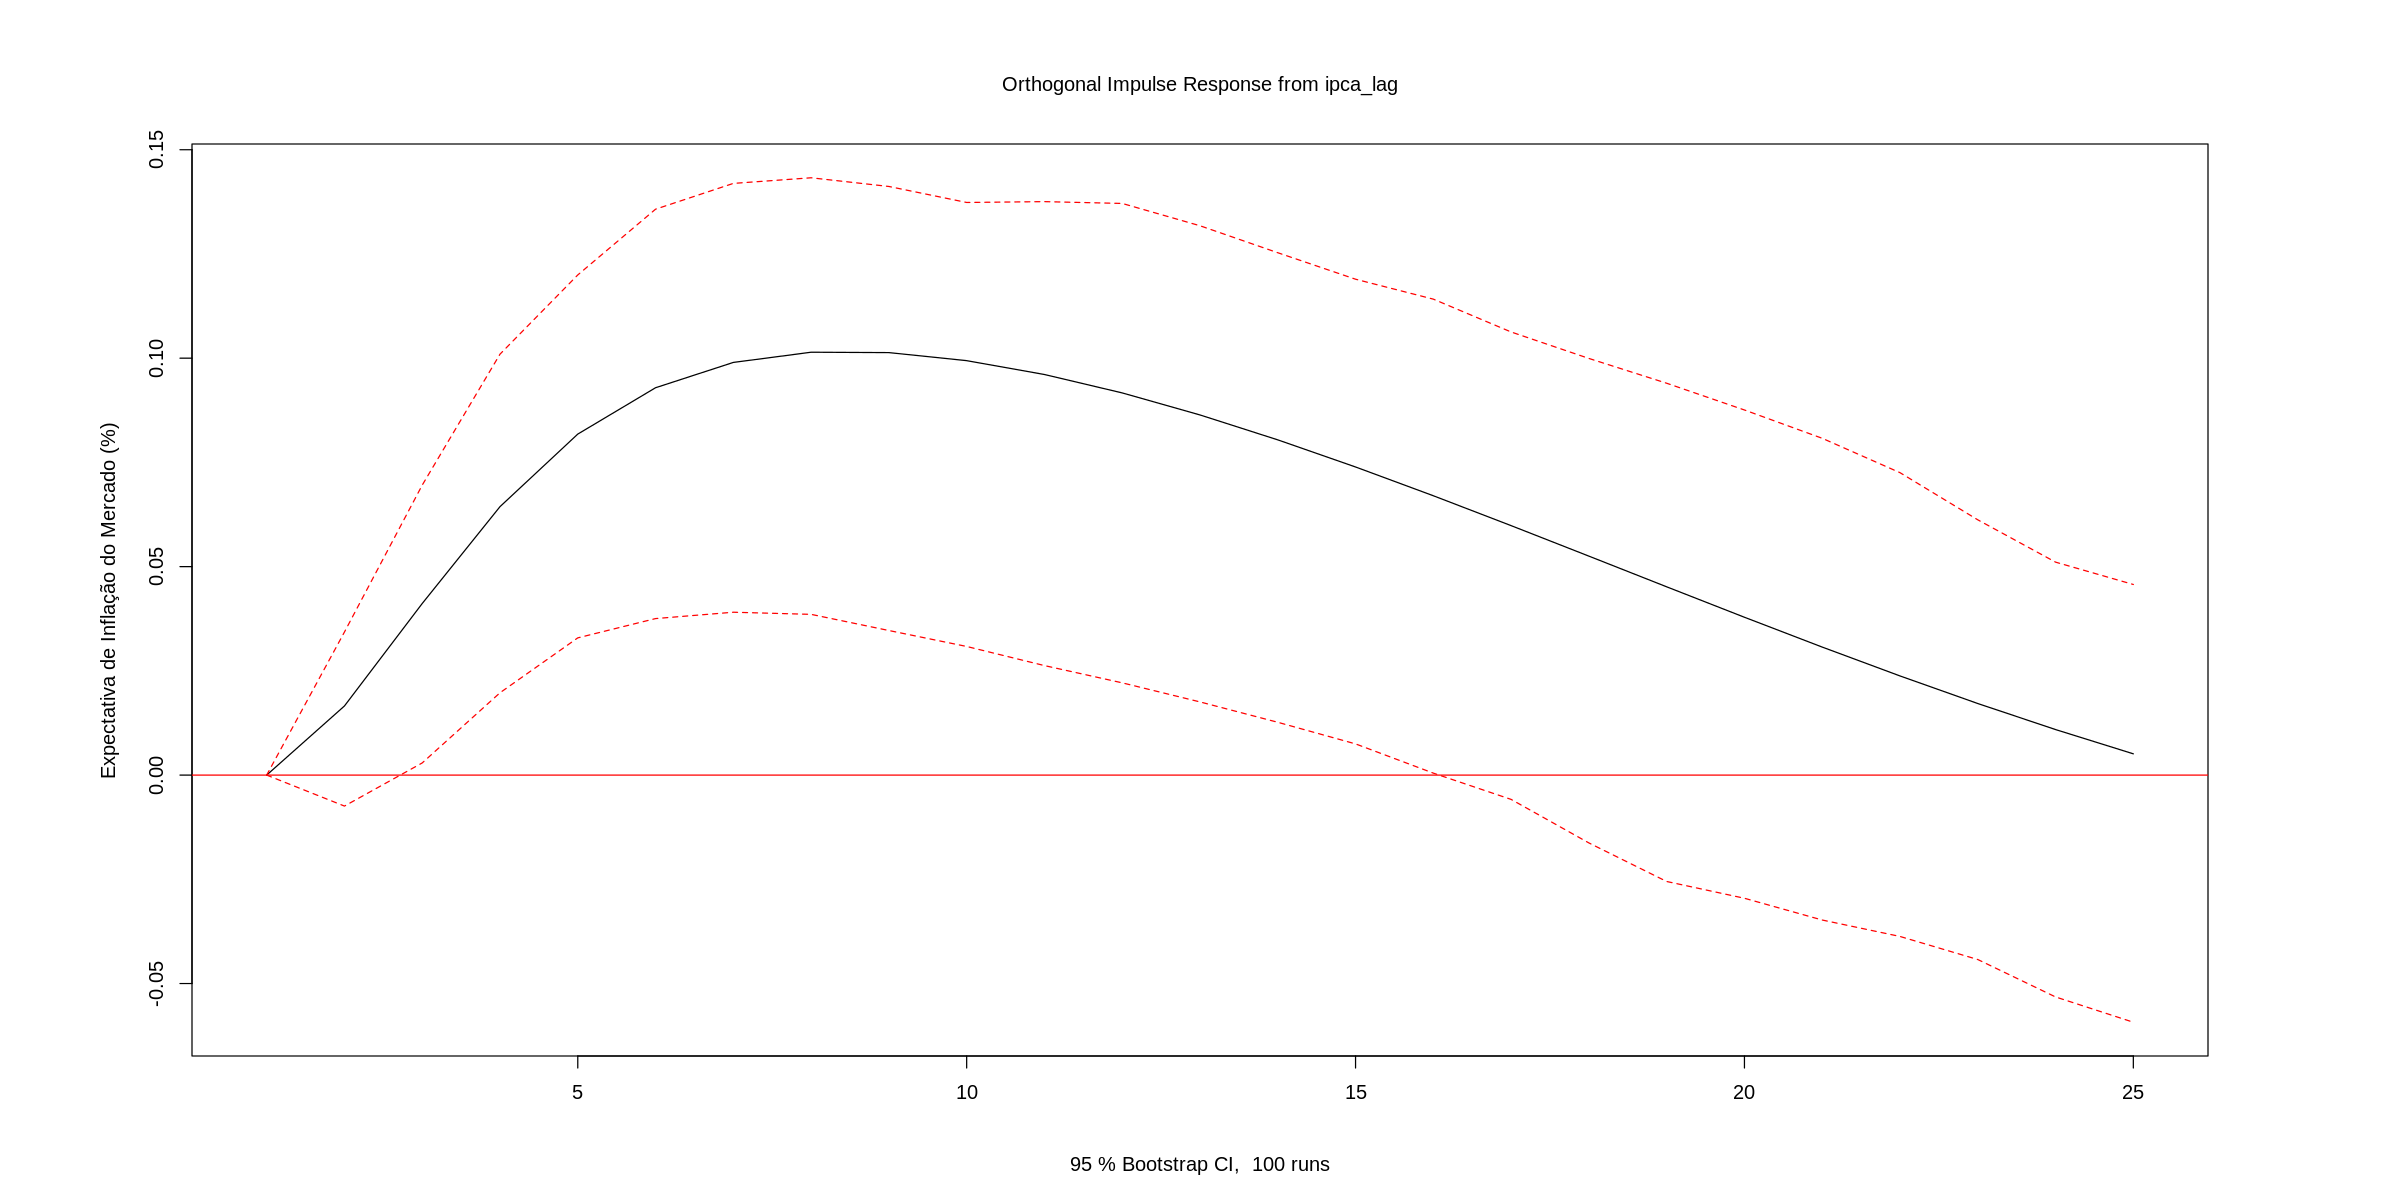

In [41]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Impulse Response Function
market_expectation_impulse = irf(var_model, impulse = "ipca_lag", response = "market_inflation_expectation", n.ahead = 24, boot = TRUE)

plot(market_expectation_impulse, ylab = "Expectativa de Inflação do Mercado (%)")

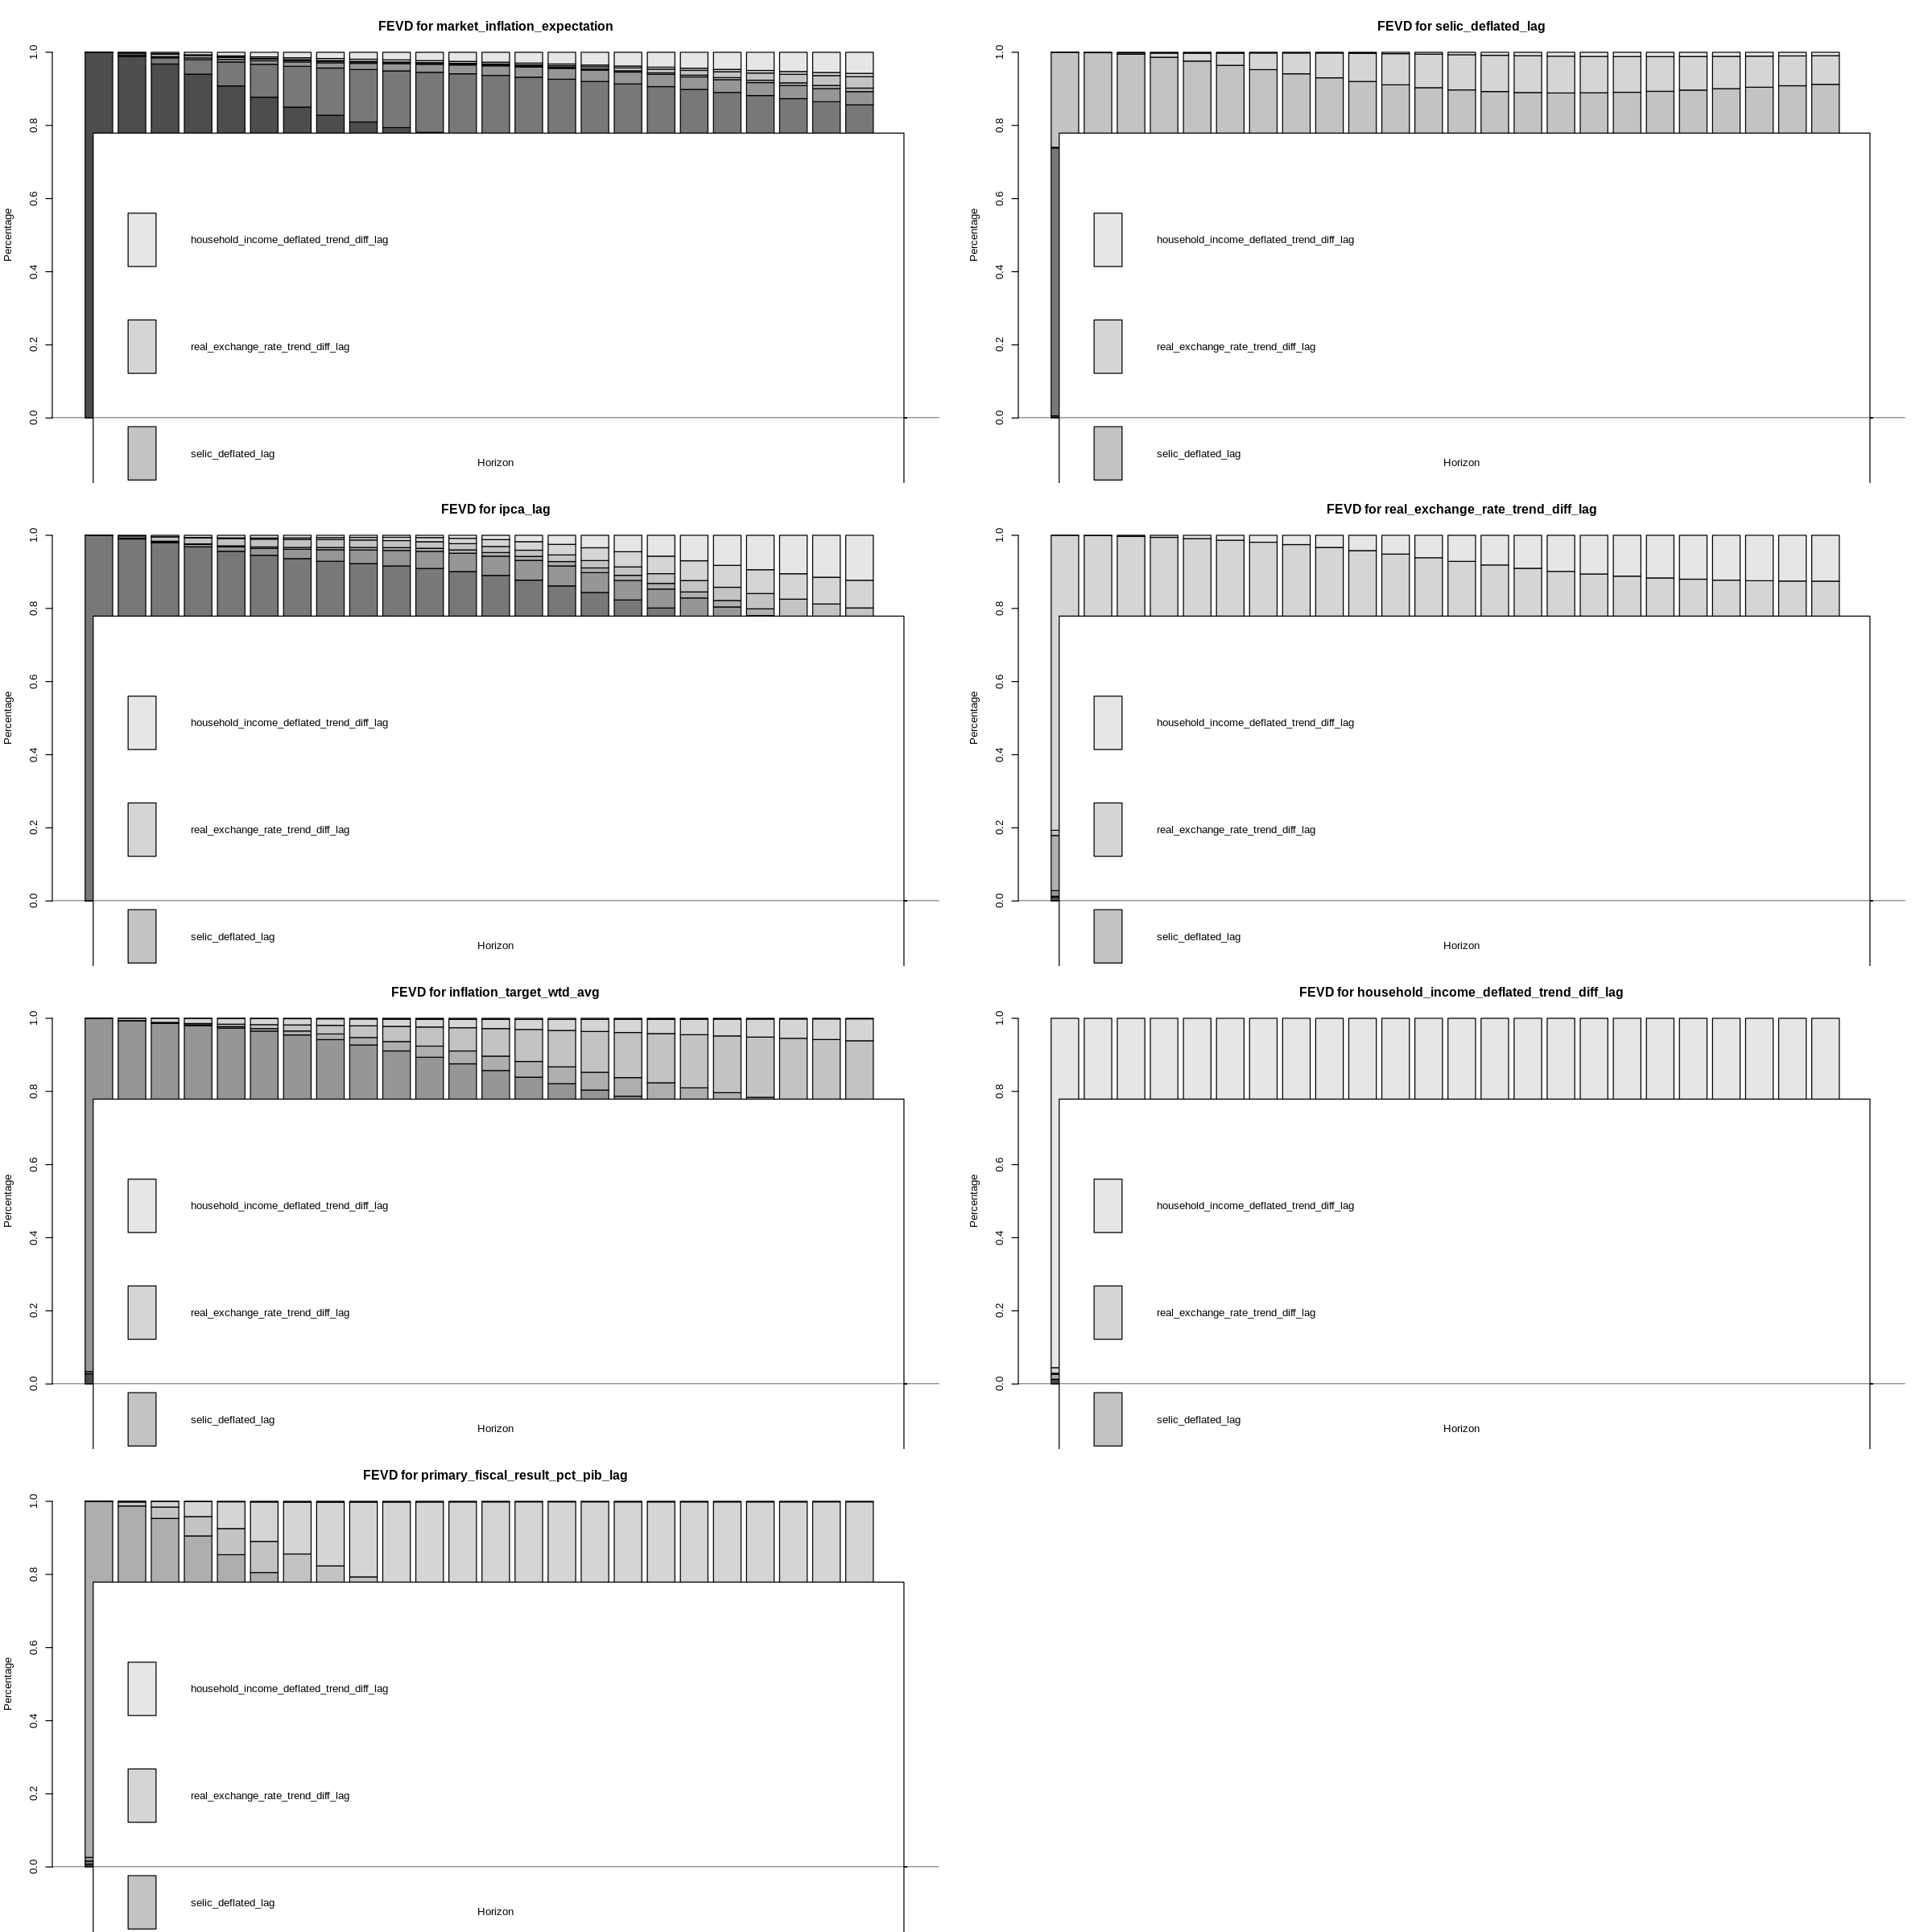

In [44]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 20)

# Função de Variação de Valores Extremos
fevd_model <- fevd(var_model, n.ahead = 24)

plot(fevd_model)

**Resultado**

-

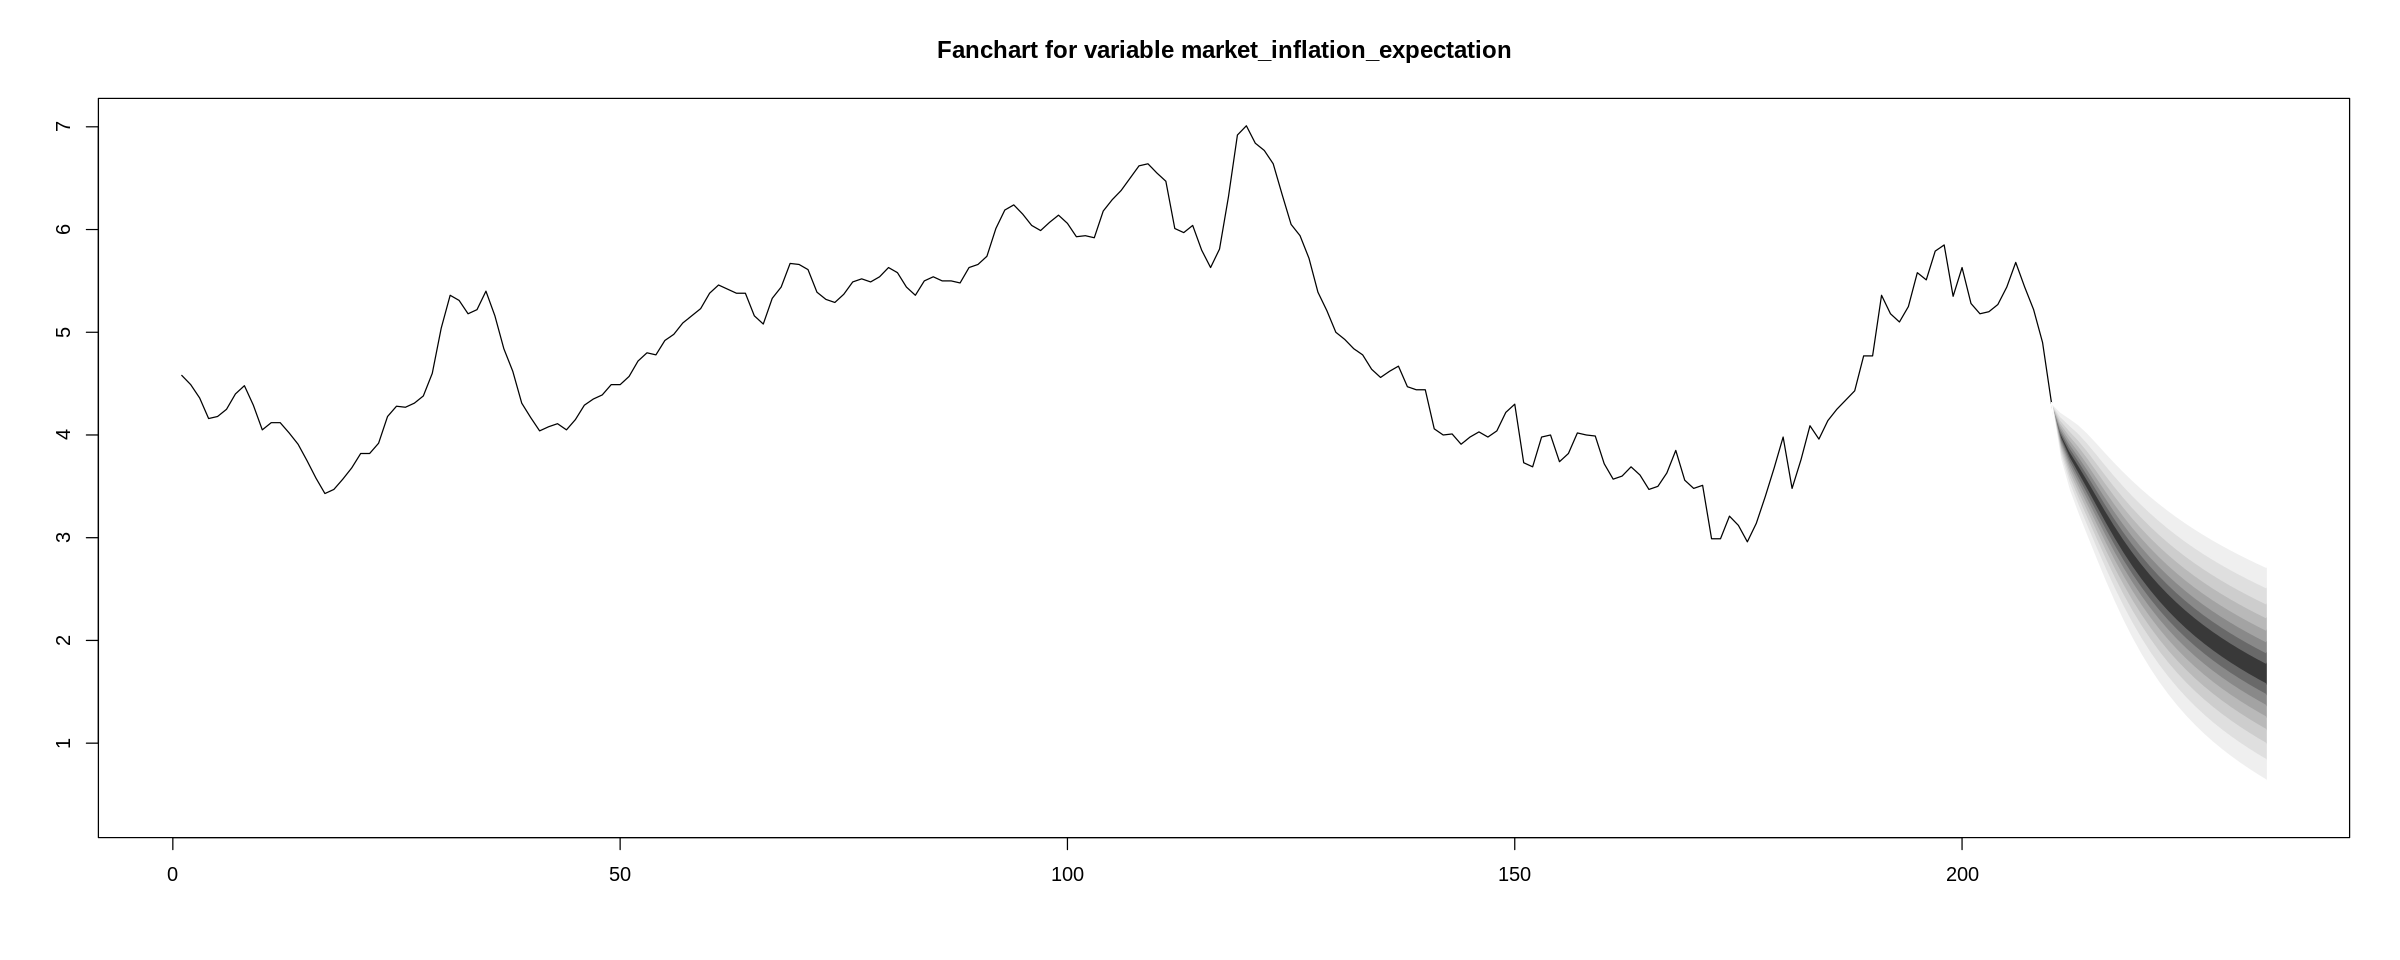

In [47]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 8)

# Forecast using VAR
forecast_var <- predict(var_model, n.ahead = 24, ci = 0.95)

fanchart(forecast_var, names = "market_inflation_expectation")

### **Modelo VECM**

In [48]:
# Selecionar variáveis do modelo VECM
vecm_model_variables <- df_public_data[, c("market_inflation_expectation", "ipca_lag", "inflation_target_wtd_avg", "primary_fiscal_result_pct_pib_lag", "selic_deflated_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")]

In [49]:
# Lag Selection (n-1)
vecm_lag <- VARselect(vecm_model_variables, lag.max = 12, type = "none")

print(vecm_lag$selection)

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      2      2      5 


In [53]:
# Johansen Test (Trace)
vecm_johansen_trace <- ca.jo(vecm_model_variables, type = "trace", ecdet = "none", K = 2)

summary(vecm_johansen_trace)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.31573230 0.17852891 0.16960514 0.11869210 0.08265848 0.05281573 0.01410868

Values of teststatistic and critical values of test:

           test  10pct   5pct   1pct
r <= 6 |   2.96   6.50   8.18  11.65
r <= 5 |  14.24  15.66  17.95  23.52
r <= 4 |  32.19  28.71  31.52  37.22
r <= 3 |  58.47  45.23  48.28  55.43
r <= 2 |  97.13  66.49  70.60  78.87
r <= 1 | 138.03  85.18  90.39 104.20
r = 0  | 216.95 118.99 124.25 136.06

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                            market_inflation_expectation.l2
market_inflation_expectation.l2                                   1.0000000
ipca_lag.l2                                                      -1.1608678
inflation_target_wtd_avg.l2                                      -7.9934648
primary_fiscal_result_pct_pib_lag.l

**Resultado**

- r = 0: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 1 relação de cointegração no sistema

- r <= 1: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 2 relações de cointegração no sistema

- r <= 2: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 2 relações de cointegração no sistema

- r <= 3: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 3 relações de cointegração no sistema

- r <= 4: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 4 relações de cointegração no sistema

- r <= 5: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 5 relações de cointegração no sistema

In [54]:
# Johansen Test (MaxEigen)
vecm_johansen_eigen <- ca.jo(vecm_model_variables, type = "eigen", ecdet = "none", K = 2)

summary(vecm_johansen_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.31573230 0.17852891 0.16960514 0.11869210 0.08265848 0.05281573 0.01410868

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 6 |  2.96  6.50  8.18 11.65
r <= 5 | 11.29 12.91 14.90 19.19
r <= 4 | 17.95 18.90 21.07 25.75
r <= 3 | 26.28 24.78 27.14 32.14
r <= 2 | 38.66 30.84 33.32 38.78
r <= 1 | 40.90 36.25 39.43 44.59
r = 0  | 78.92 42.06 44.91 51.30

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                            market_inflation_expectation.l2
market_inflation_expectation.l2                                   1.0000000
ipca_lag.l2                                                      -1.1608678
inflation_target_wtd_avg.l2                                      -7.9934648
primary_fiscal_result_pct_pib_lag.l2     

**Resultado**

- r = 0: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 1 relação de cointegração no sistema

- r <= 1: Como teststatistic é maior que critical value a um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, existe ao menos 2 relações de cointegração no sistema

- r <= 2: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 2 relações de cointegração no sistema

- r <= 3: Como teststatistic é menor que critical value a um nível de significância de 5%, não se rejeita a hipótese nula, ou seja, existe no máximo 3 relações de cointegração no sistema

In [58]:
# Criar modelo VECM
vecm_model <- VECM(vecm_model_variables, 2, r = 3, estim = ("ML"))

summary(vecm_model)

#############
###Model VECM 
#############
Full sample size: 210 	End sample size: 207
Number of variables: 7 	Number of estimated slope parameters 126
AIC -5037.369 	BIC -4577.454 	SSR 1895.56
Cointegrating vector (estimated by ML):
   market_inflation_expectation      ipca_lag inflation_target_wtd_avg
r1                 1.000000e+00 -9.239261e-17             0.000000e+00
r2                -9.348988e-17  1.000000e+00             2.220446e-16
r3                -1.705193e-17  4.115087e-17             1.000000e+00
   primary_fiscal_result_pct_pib_lag selic_deflated_lag
r1                       -0.02369033         0.17650904
r2                       -0.11321798         0.40086893
r3                        0.05404175        -0.05952274
   real_exchange_rate_trend_diff_lag household_income_deflated_trend_diff_lag
r1                      0.0562916093                               -0.3966854
r2                      0.0136842996                               -0.6813495
r3                     -

In [59]:
# VECM specification to VAR specification
vecm_model_formatted <- vec2var(vecm_johansen_trace, r = 2)

In [61]:
# Serial Correlation
vecm_serial_test <- serial.test(vecm_model_formatted, lags.pt = 12, type = "PT.asymptotic")

print(vecm_serial_test)


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 923.28, df = 497, p-value < 2.2e-16



$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 923.28, df = 497, p-value < 2.2e-16



**Resultado**

- Como o p-value é menor que um nível de significância de 5%, não se pode afirmar que as variáveis não possuem correlação serial

In [62]:
# Heteroscedasticity
vecm_arch_test <- arch.test(vecm_model_formatted, lags.multi = 12, multivariate.only = TRUE)

print(vecm_arch_test)


	ARCH (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 5488, df = 9408, p-value = 1



$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 5488, df = 9408, p-value = 1



**Resultado**

- Como o p-value é maior que um nível de significância de 5%, pode-se afirmar que o modelo não possui heteroscedasticidade

In [63]:
# Normal Distribution of Residuals
vecm_normal_test <- normality.test(vecm_model_formatted, multivariate.only = TRUE)

print(vecm_normal_test)

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 4906, df = 14, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 287.09, df = 7, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 4618.9, df = 7, p-value < 2.2e-16




$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 4906, df = 14, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 287.09, df = 7, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object vecm_model_formatted
Chi-squared = 4618.9, df = 7, p-value < 2.2e-16




**Resultado**

- Como o p-value é menor que um nível de significância de 5% no JB-test, não se pode afirmar que os resíduos são distribuídos de forma gaussiana

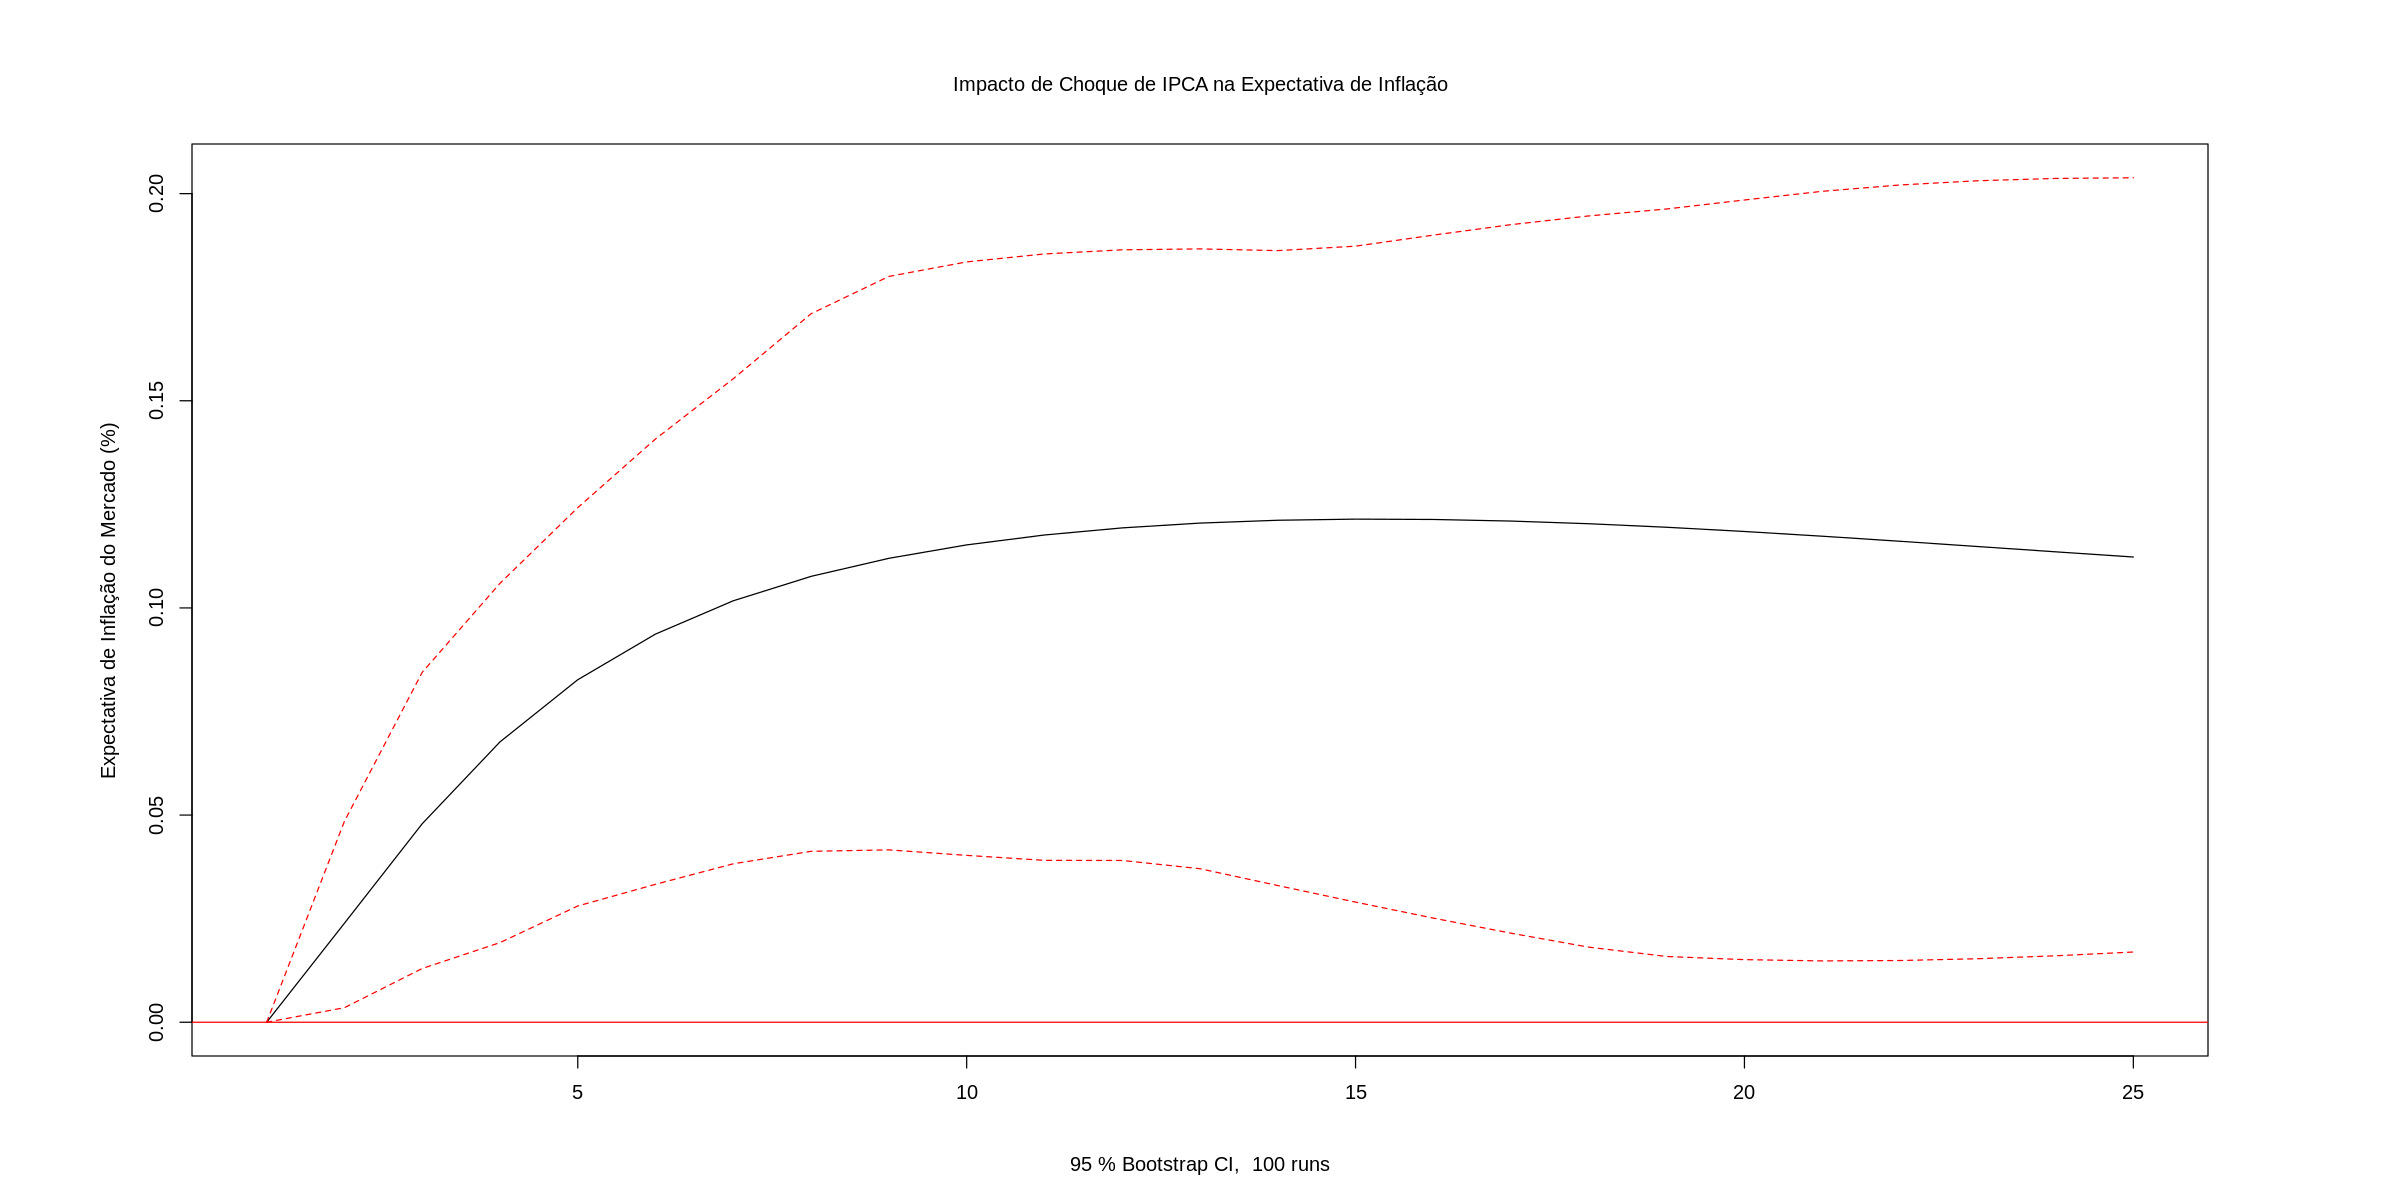

In [67]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Impulse Response Function
vecm_ipca_market_expectation_impulse = irf(vecm_model_formatted, impulse = "ipca_lag", response = "market_inflation_expectation", n.ahead = 24, boot = TRUE)

plot(vecm_ipca_market_expectation_impulse, ylab = "Expectativa de Inflação do Mercado (%)", main = "Impacto de Choque de IPCA na Expectativa de Inflação")

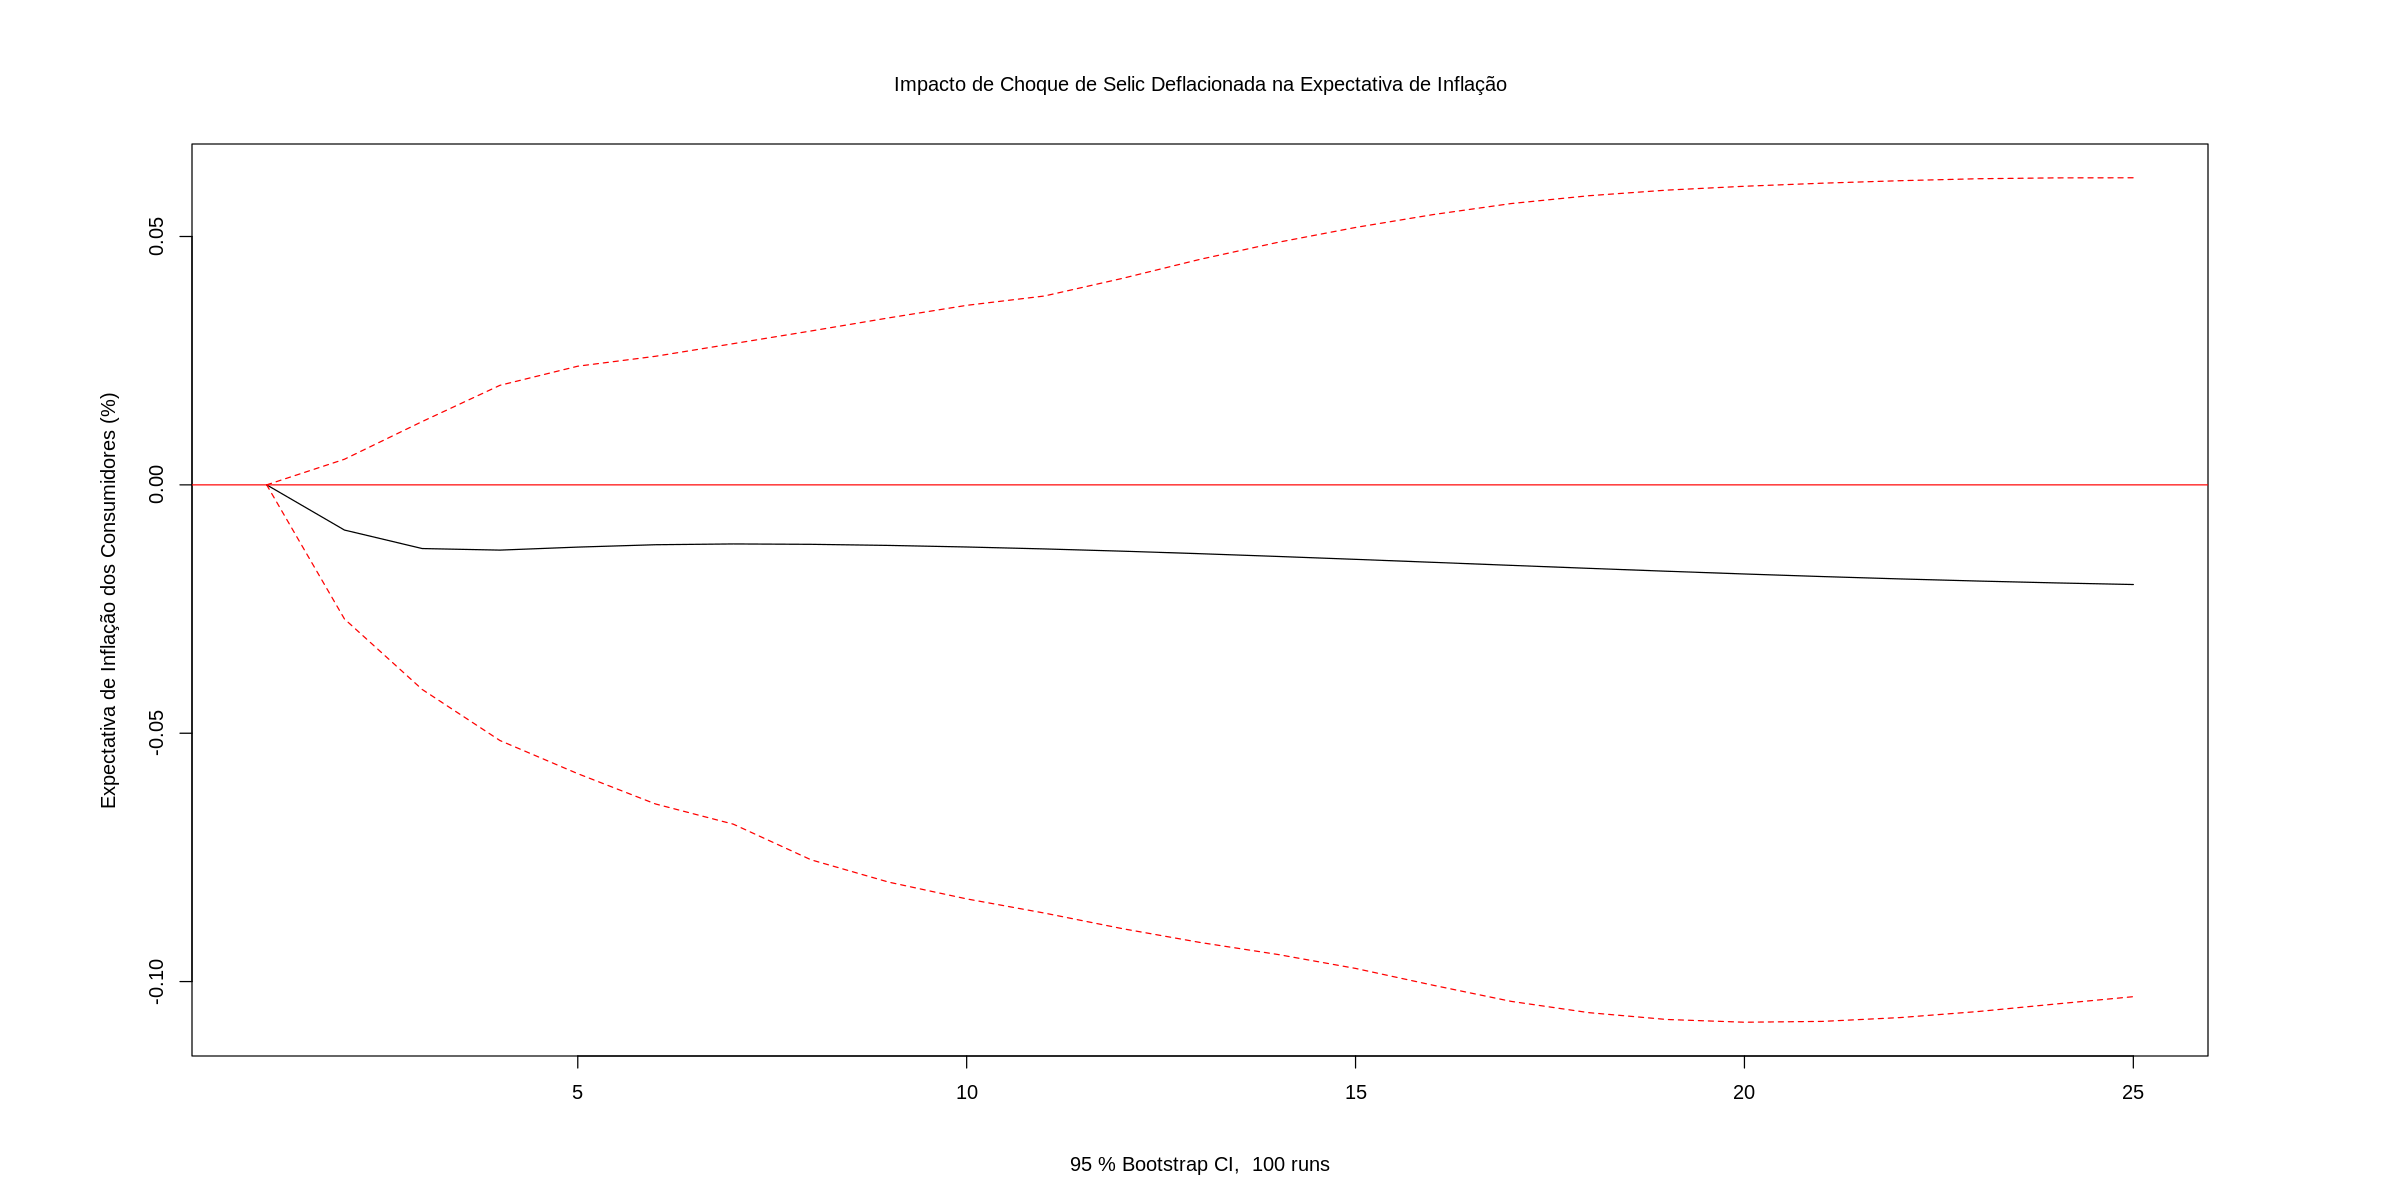

In [69]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Impulse Response Function
vecm_selic_market_expectation_impulse = irf(vecm_model_formatted, impulse = "selic_deflated_lag", response = "market_inflation_expectation", n.ahead = 24, boot = TRUE)

plot(vecm_selic_market_expectation_impulse, ylab = "Expectativa de Inflação dos Consumidores (%)", main = "Impacto de Choque de Selic Deflacionada na Expectativa de Inflação")

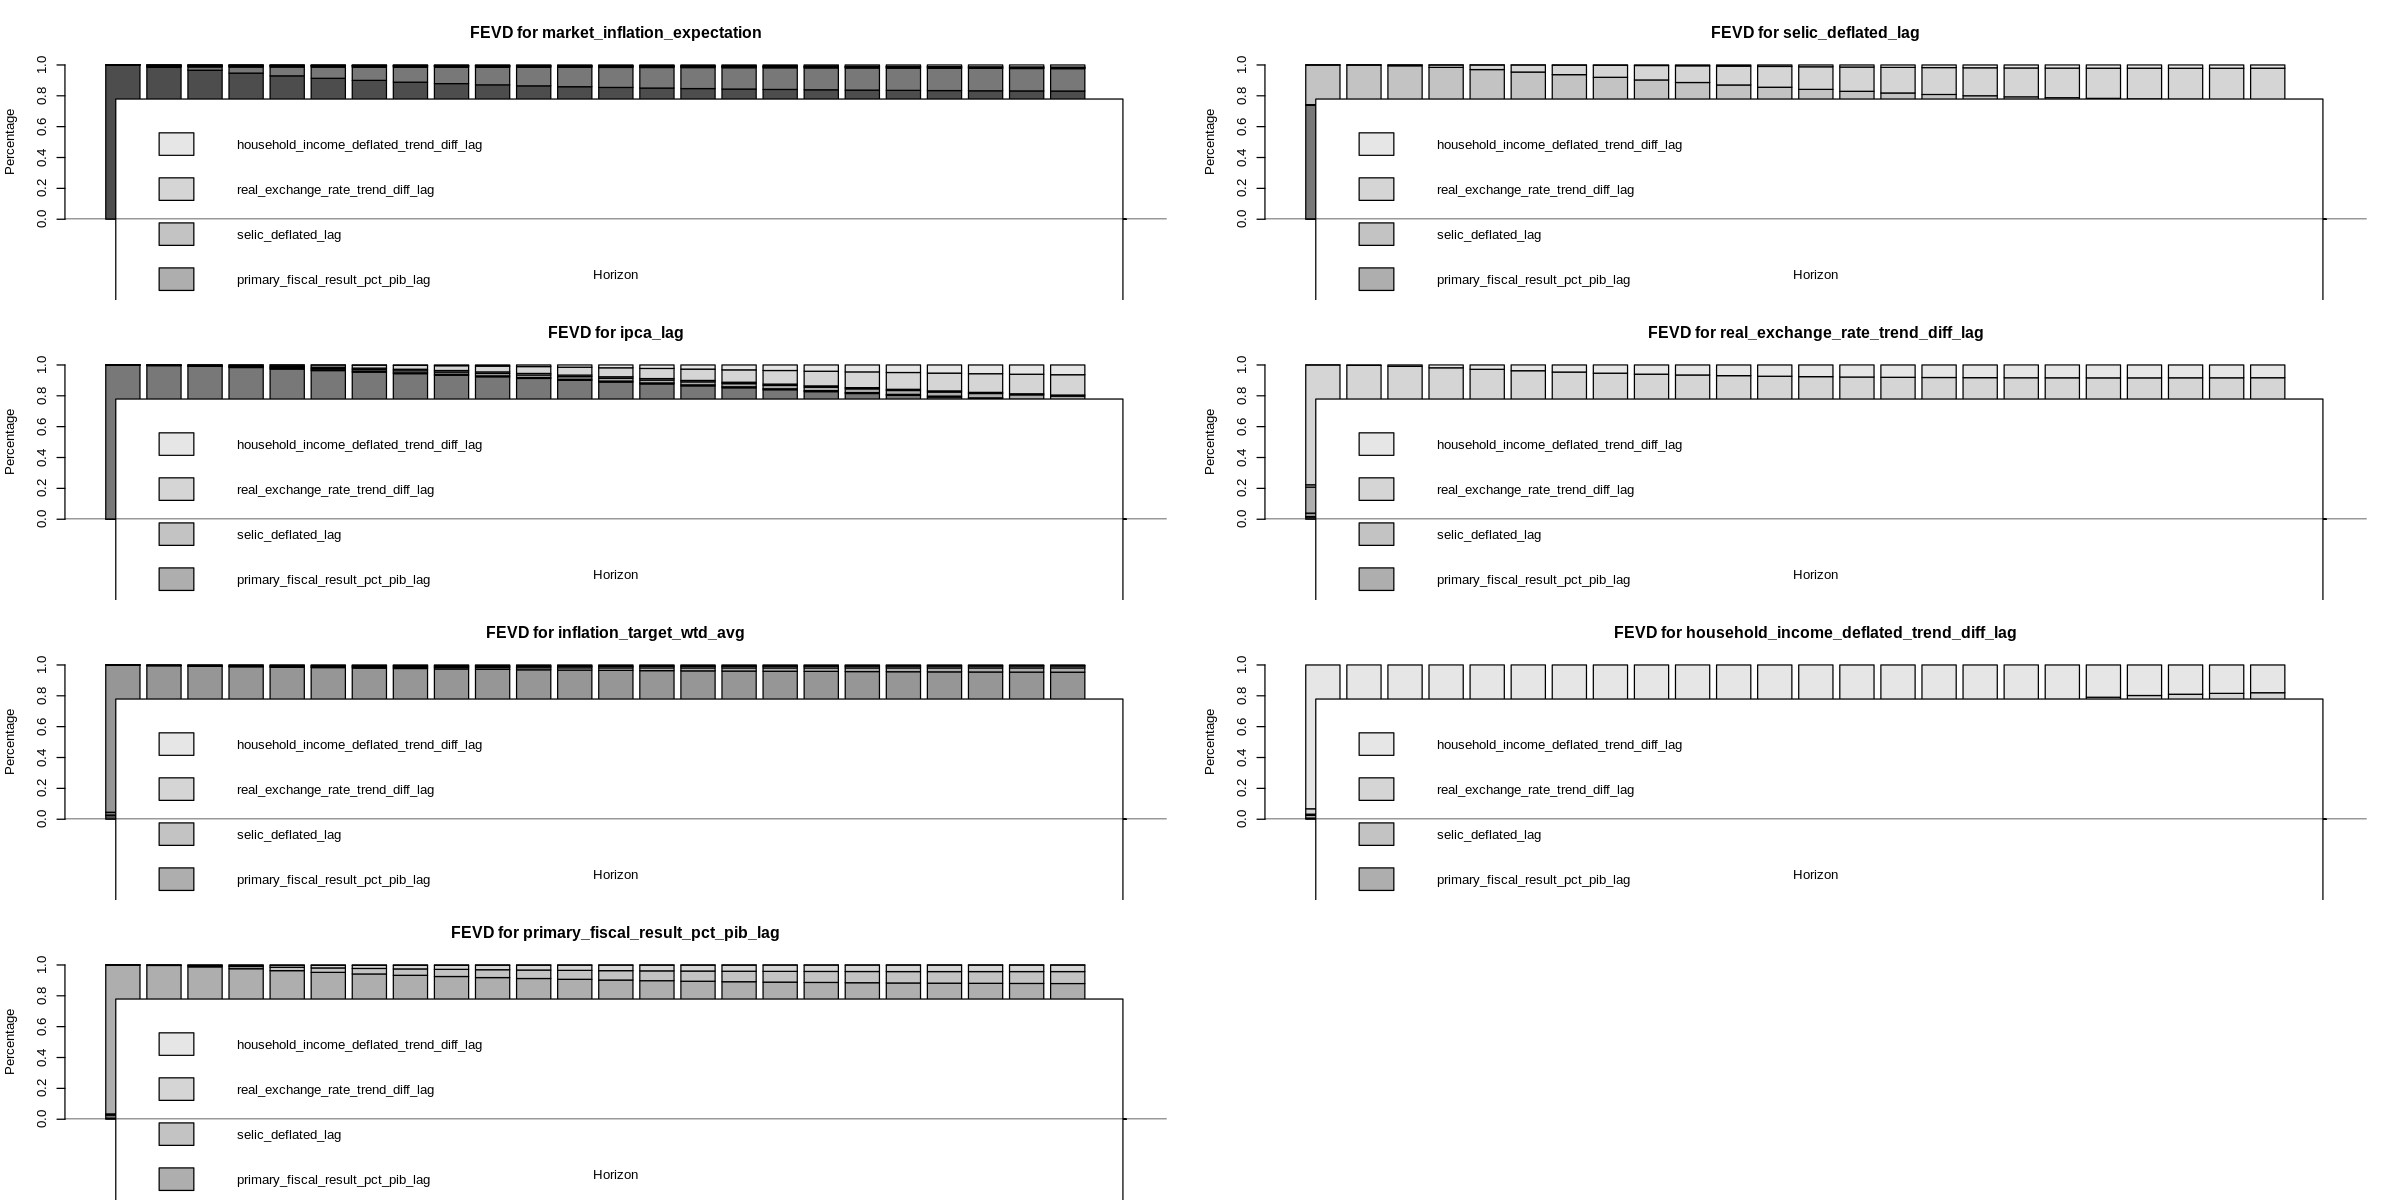

In [70]:
# Variance Decomposition
vecm_fevd <- fevd(vecm_model_formatted, n.ahead = 24)

plot(vecm_fevd)

**Resultado**

-

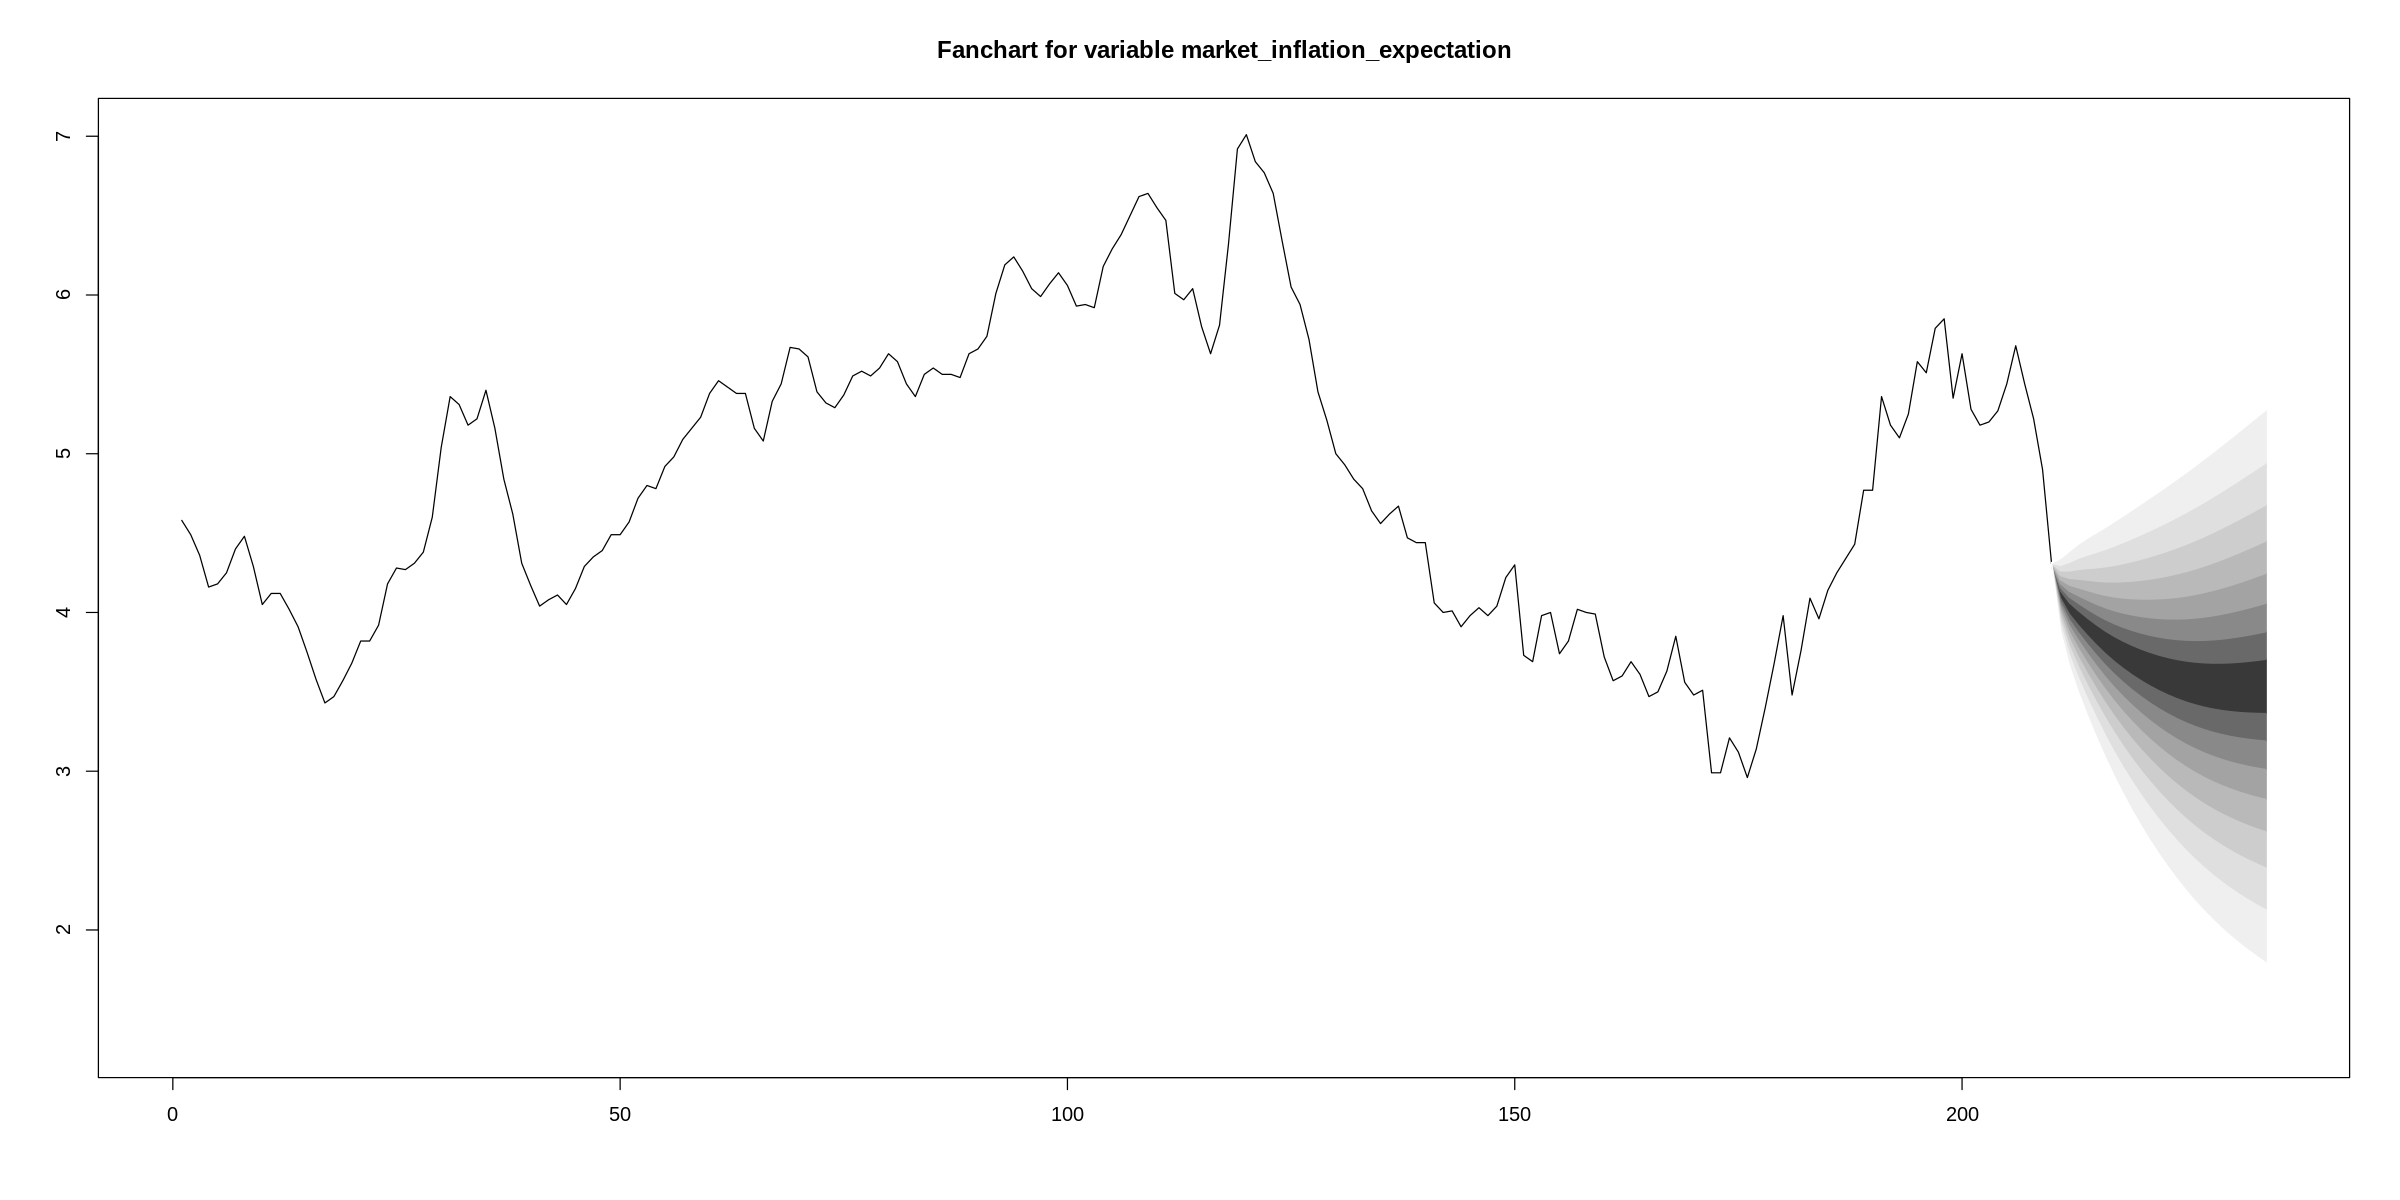

In [72]:
# Forecast using VECM
forecast_vecm <- predict(vecm_model_formatted, n.ahead = 24, ci = 0.95)

fanchart(forecast_vecm, names = "market_inflation_expectation")